# Zomato Exploratory data Analysis

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df= pd.read_csv('zomato.csv', encoding = 'latin-1')
df_c = pd.read_excel('Country-Code.xlsx')

In [66]:
df.info()
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [67]:
df_c.head()


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [68]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [69]:
# missing values in df_cc
df_c.isnull().sum()

Country Code    0
Country         0
dtype: int64

In [70]:
# we can all check null using following function df 
[features for features in df.columns if df[features].isnull().sum()>0] # using list compresion

['Cuisines']

<Axes: >

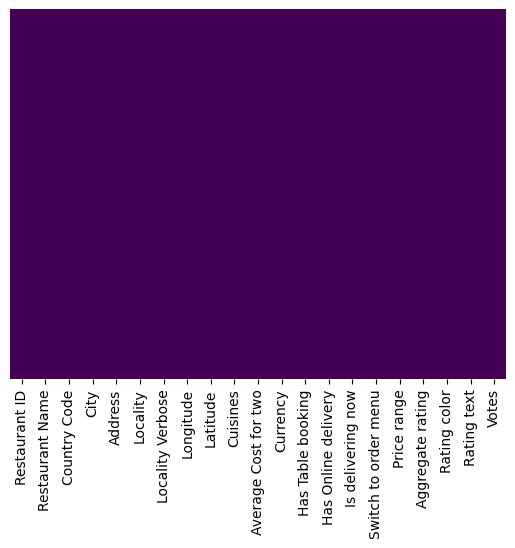

In [71]:
# cheching missing values usig seaborn
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') #due to very minimunnull values are not visible

In [72]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [73]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [74]:
df_c.columns

Index(['Country Code', 'Country'], dtype='object')

In [75]:
df = pd.merge(df,df_c, on ='Country Code',how = 'left')

In [76]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

# different ways to see country columns in df 

In [77]:
df.Country

0       Phillipines
1       Phillipines
2       Phillipines
3       Phillipines
4       Phillipines
           ...     
9546         Turkey
9547         Turkey
9548         Turkey
9549         Turkey
9550         Turkey
Name: Country, Length: 9551, dtype: object

In [78]:
df.Country.unique() 

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [79]:
df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [80]:
country_name = df.Country.value_counts().index

In [81]:
country_name

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [82]:
country_value = df.Country.value_counts().values

In [83]:
country_value


array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

In [84]:
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [85]:
 df.loc[df['Cuisines'].isnull(),'Country']                   

84     United States
87     United States
94     United States
297    United States
328    United States
346    United States
368    United States
418    United States
455    United States
Name: Country, dtype: object

([<matplotlib.patches.Wedge at 0x1b58cfd9600>,
 [Text(-1.123647444436605, 0.24477830911068643, 'India'),
  Text(1.1045264674231805, -0.32018944823599393, 'United States'),
  Text(1.1432673709043546, -0.12425666430998868, 'United Kingdom'),
  Text(1.1478683359667137, -0.06998773667584866, 'Brazil'),
  Text(1.1497630858261607, -0.023341946609163982, 'UAE')],
 [Text(-0.6351050772902549, 0.13835295732343145, '93.17%'),
  Text(0.6242975685435366, -0.18097664465512697, '4.67%'),
  Text(0.6461946009459395, -0.07023202765347186, '0.86%'),
  Text(0.6487951464159685, -0.0395582859472188, '0.65%'),
  Text(0.6498660919886994, -0.013193274170397031, '0.65%')])

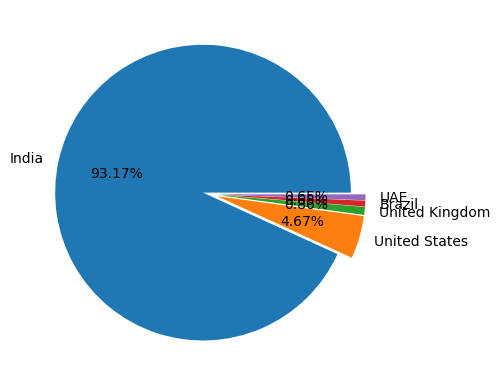

In [86]:
# pie chart for to 5  country
explode = [0.05] * 5  # Slightly separate all 5 slices
plt.pie(country_value[:5],labels= country_name[:5],autopct='%1.2f%%', explode= explode)

observation:
>zomato maximun branches are in india  
>after india united states ,united kingdom,brazil and uae has hightest branch


# rating columns observation

In [87]:
grouped = df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns ={0: 'Rating count'})

In [88]:
grouped

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


obervation:
> highly ratings  is 0.0 which means not rated

> 2nd highly ratings is given is 3.2

> average rating falls betwwen 2.3 to 3.4

> the no rating beside not rated is also under average rating

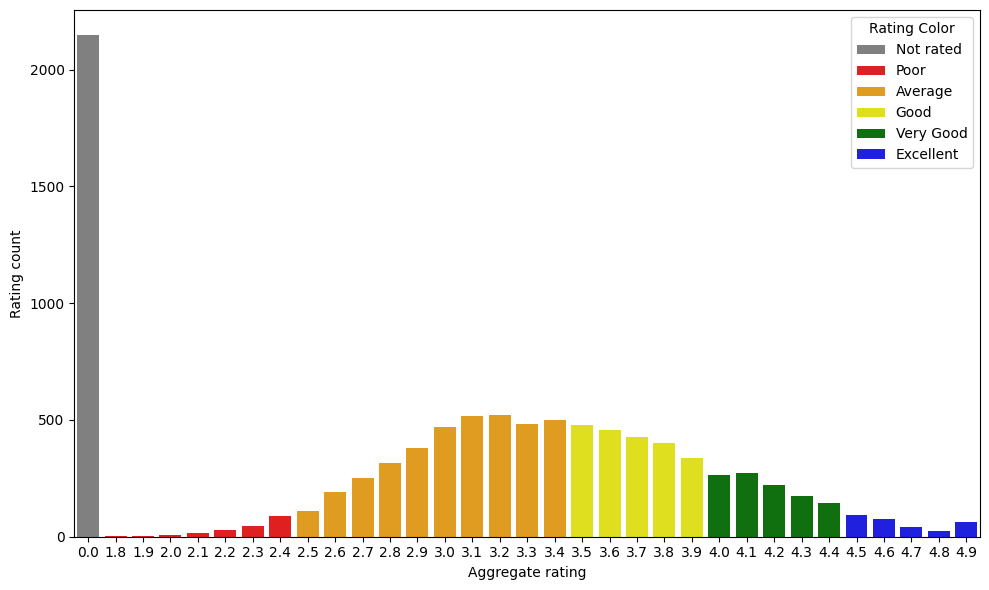

In [89]:
# visulaization 
# Sort by Aggregate Rating for better visuals
grouped = grouped.sort_values(by='Aggregate rating', ascending=False)
palette=['grey','red','orange','yellow','green','blue']

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped,x='Aggregate rating', y='Rating count', hue='Rating text',palette= palette)
plt.legend(title='Rating Color')
plt.tight_layout()

obervation:
> avrage voting is between 2.8 to 3.9

>highly voting is to no rating which is 0.0

>good  and exellent rating votes are more than poor rating
>

# country column observation

In [90]:
# find the country that given o ratings
df[df['Aggregate rating']==0.0].groupby('Country').size().reset_index().rename(columns ={0: 'Restaurent count'})


,Country,Restaurent count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


obersvation:
> Only in 4 country which does not give rating

> India has most not rated restaurent

 

In [91]:
# find which currency used by which country
df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index().rename(columns ={0: 'Currency count'})

,Country,Currency,Currency count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [92]:
df[['Country', 'Currency']].drop_duplicates().sort_values('Country').reset_index(drop=True).reset_index()



,index,Country,Currency
0,0,Australia,Dollar($)
1,1,Brazil,Brazilian Real(R$)
2,2,Canada,Dollar($)
3,3,India,Indian Rupees(Rs.)
4,4,Indonesia,Indonesian Rupiah(IDR)
5,5,New Zealand,NewZealand($)
6,6,Phillipines,Botswana Pula(P)
7,7,Qatar,Qatari Rial(QR)
8,8,Singapore,Dollar($)
9,9,South Africa,Rand(R)


In [93]:
# country that has online deliveries 
df[df['Has Online delivery']=='Yes'].groupby('Country').size().reset_index().rename(columns ={0: 'Restaurent count'})

,Country,Restaurent count
0,India,2423
1,UAE,28


Observations:
> Restaurent in India and and UAE has online delivery


In [94]:
# find top 10 cuisines 
top_10_cuisines = df['Cuisines'].value_counts().head(10)
print(top_10_cuisines)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_5312\2813975358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette='viridis')


Text(0.5, 1.0, 'Top 10 Most Common Cuisines')

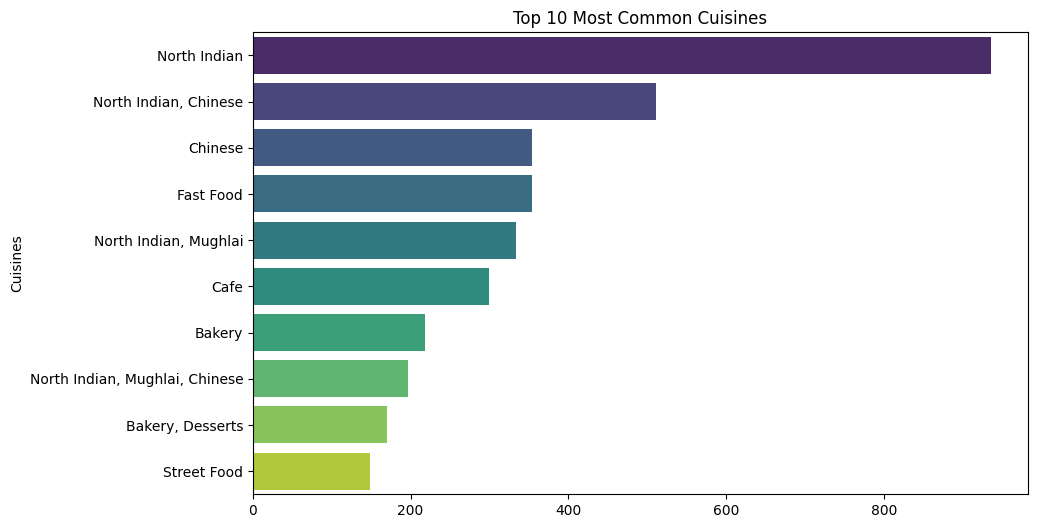

In [95]:
# visualization
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette='viridis')
plt.title('Top 10 Most Common Cuisines')

In [96]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [99]:
df.groupby('Country')['City'].nunique()  # Unique cities per country

Country
Australia         23
Brazil             3
Canada             4
India             43
Indonesia          4
New Zealand        2
Phillipines        9
Qatar              1
Singapore          1
South Africa       6
Sri Lanka          1
Turkey             2
UAE                3
United Kingdom     4
United States     35
Name: City, dtype: int64